# Coronavirus World Cases Vizualisations

In [487]:
### import libraries
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
print('Libraries imported.')

Libraries imported.


In [488]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [489]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [490]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
Recovered = recovered_df.loc[:, cols[4]:cols[-1]]

In [491]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
Recovered_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = Recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    Recovered_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [492]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [493]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [494]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

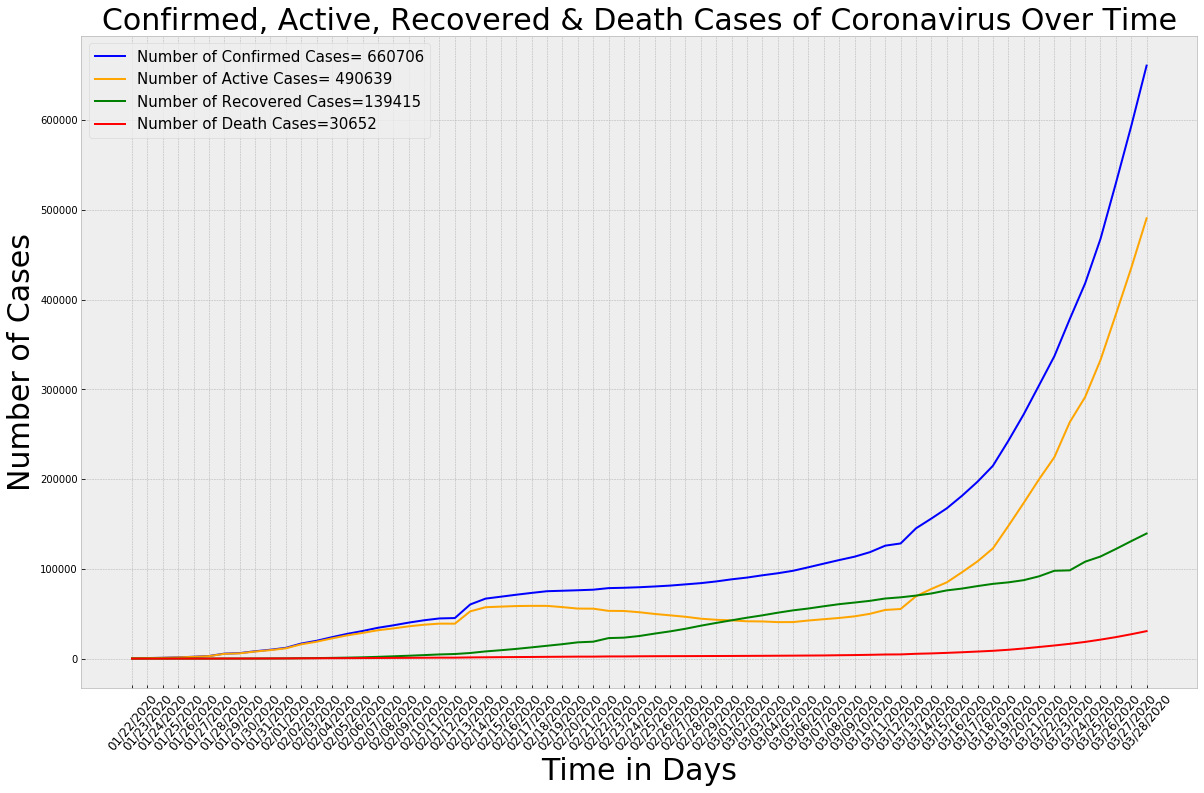

In [495]:
#Coronavirus Active/Confirmed/Recovered/Dead Cases Over Time
plt.figure(figsize=(20, 12))
plt.style.use('bmh')
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovered & Death Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovered Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

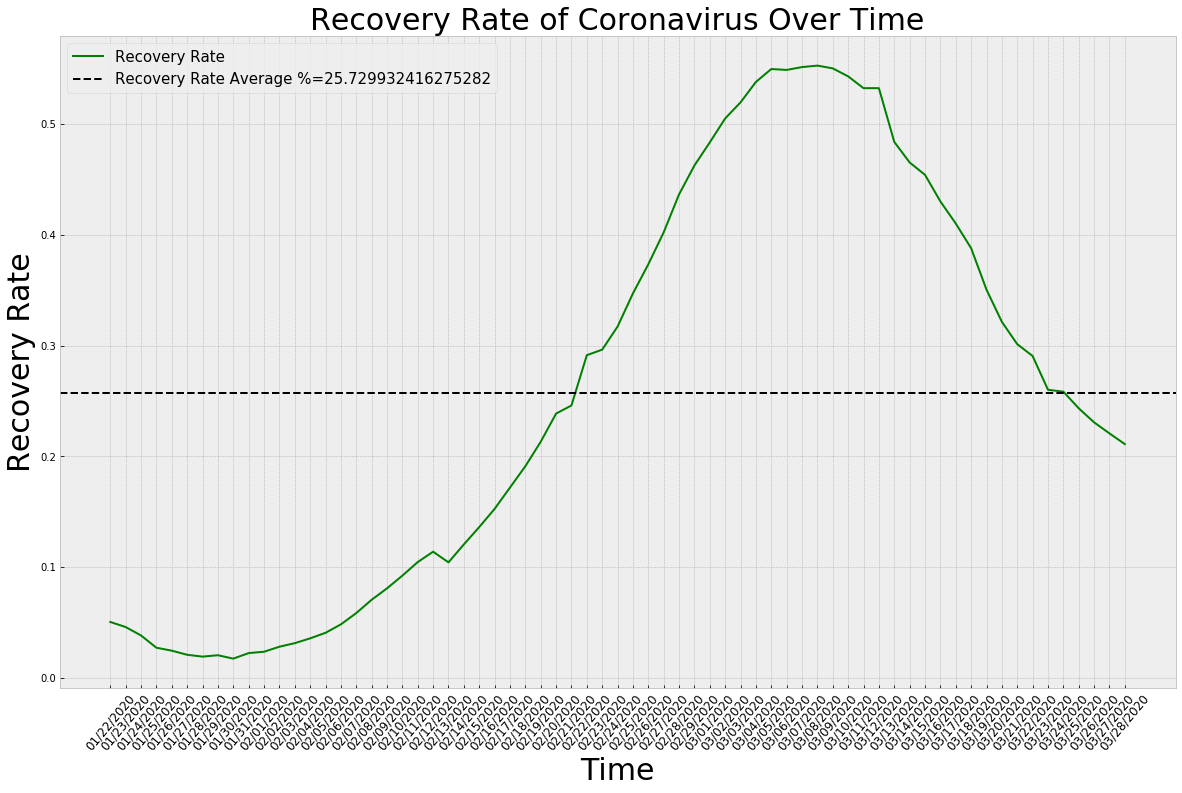

In [496]:
###Recovered Rate of Coronavirus Over Time
mean_Recovered_rate = np.mean(Recovered_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Recovered_rate, color='green')
plt.axhline(y = mean_Recovered_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_Recovered_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

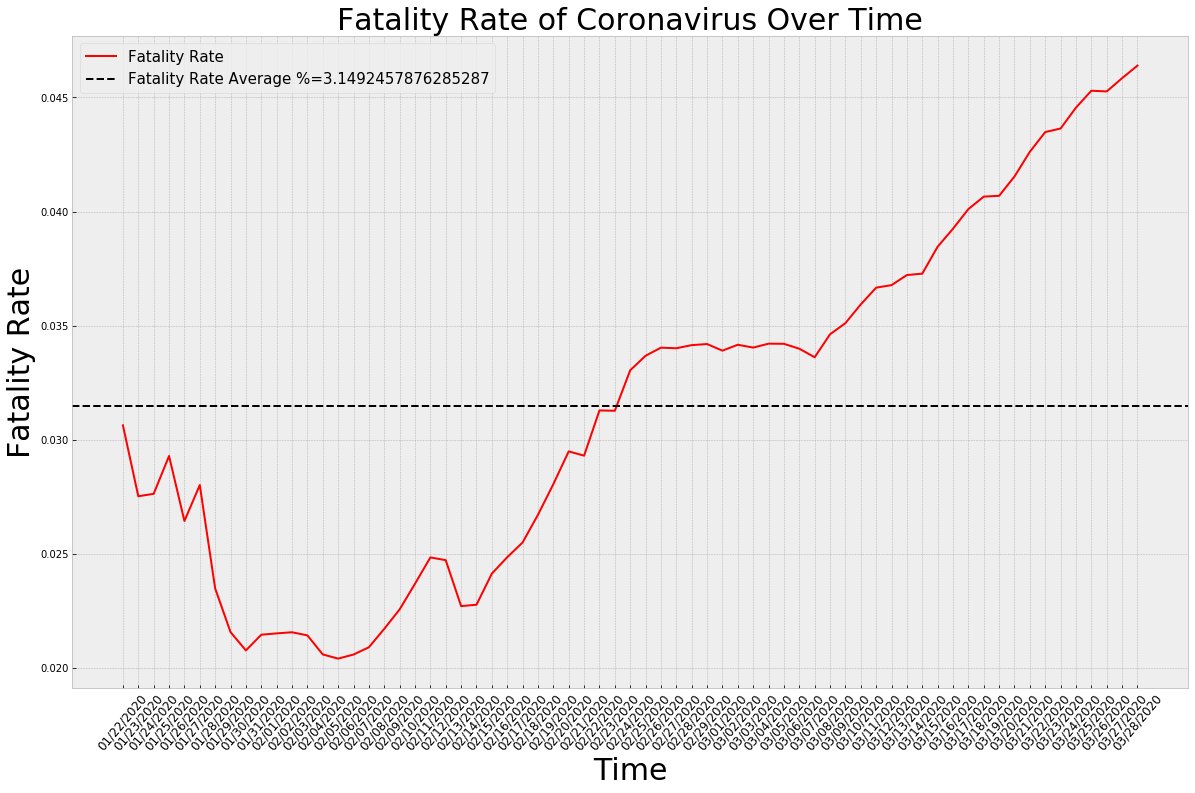

In [497]:
###Mortality Rate of Coronavirus Over Time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Fatality Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

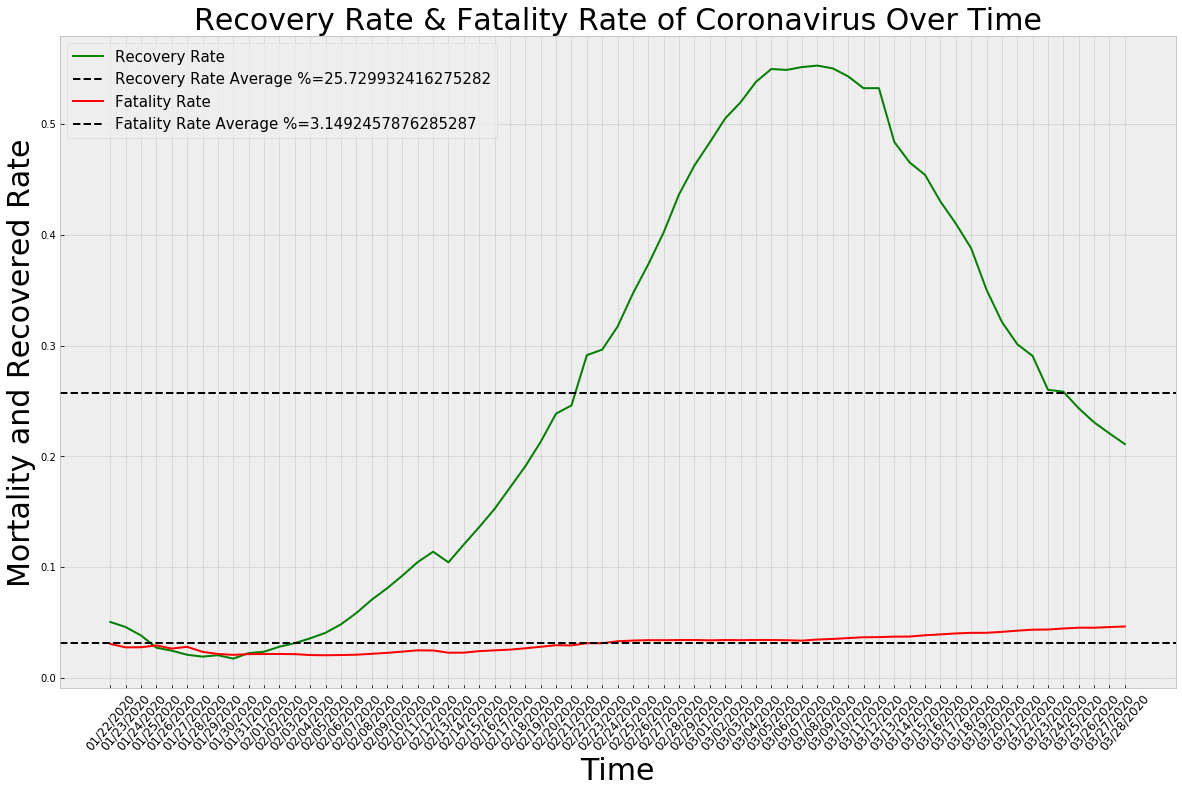

In [498]:
###Coronavirus Recovered & Mortality Rate Over Time
mean_Recovered_rate = np.mean(Recovered_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Recovered_rate, color='green')
plt.axhline(y = mean_Recovered_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_Recovered_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality and Recovered Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

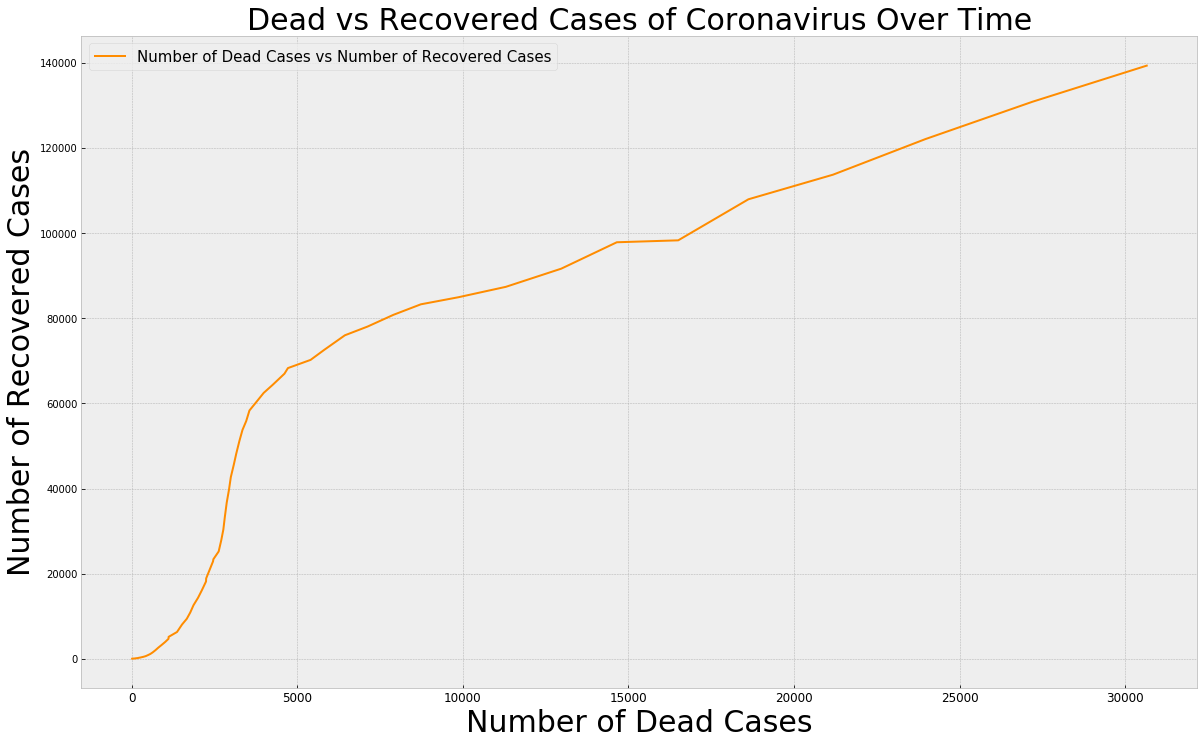

In [499]:
##Dead Cases vs Recovered Cases
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, total_recovered, color='darkorange')
plt.title('Dead vs Recovered Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Dead Cases vs Number of Recovered Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Dead Cases', size=30)
plt.ylabel('Number of Recovered Cases', size=30)
plt.xticks(size=12)
plt.show()

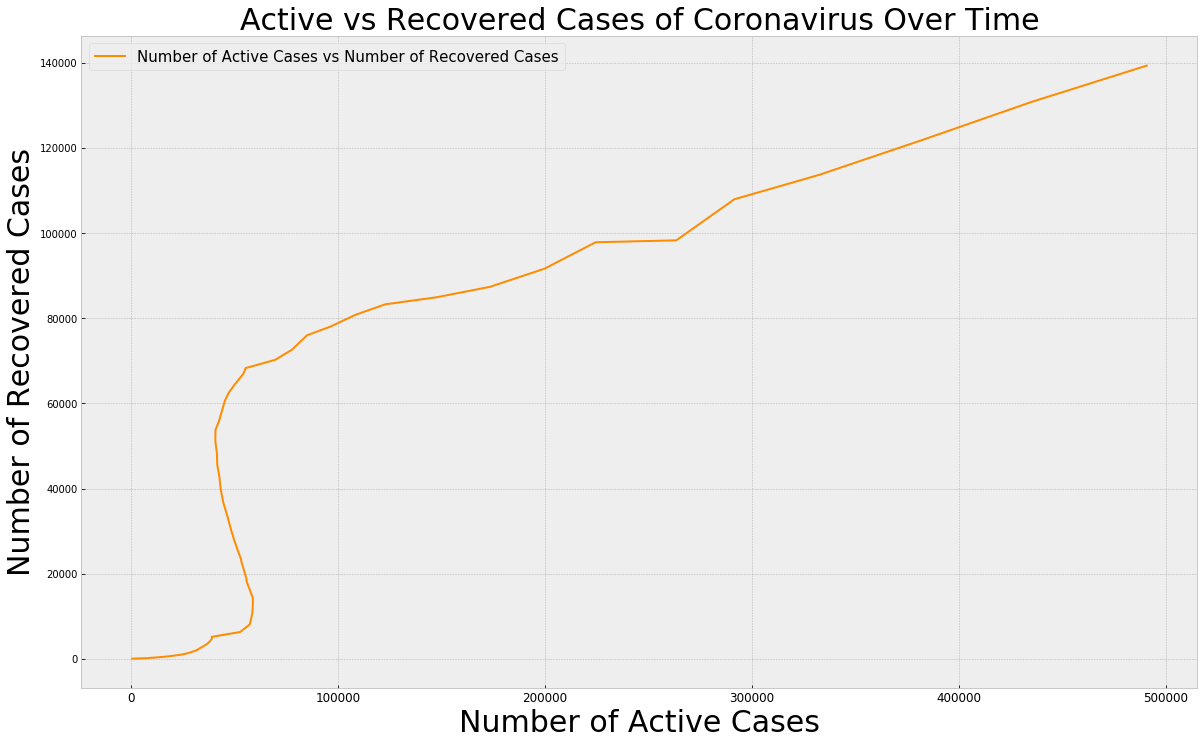

In [500]:
##Active vs Recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='darkorange')
plt.title('Active vs Recovered Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovered Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovered Cases', size=30)
plt.xticks(size=12)
plt.show()

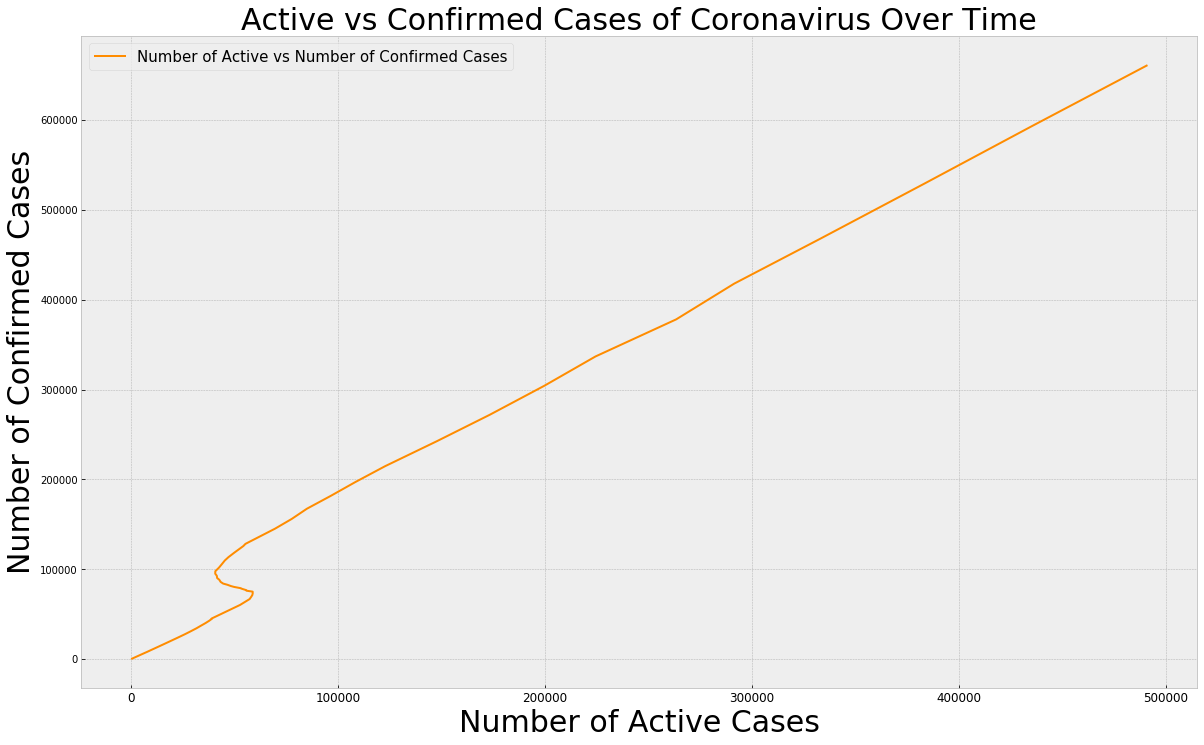

In [501]:
##Active vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, world_cases, color='darkorange')
plt.title('Active vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

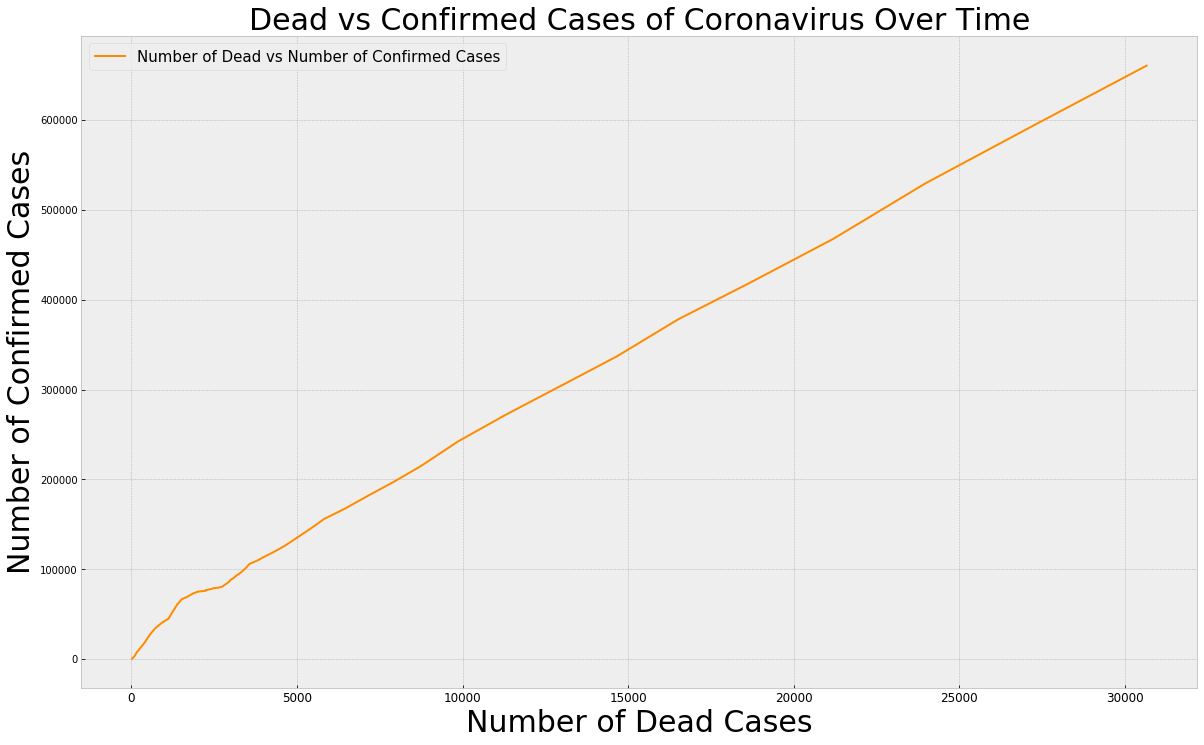

In [502]:
##Dead vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, world_cases, color='darkorange')
plt.title('Dead vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Dead vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Dead Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

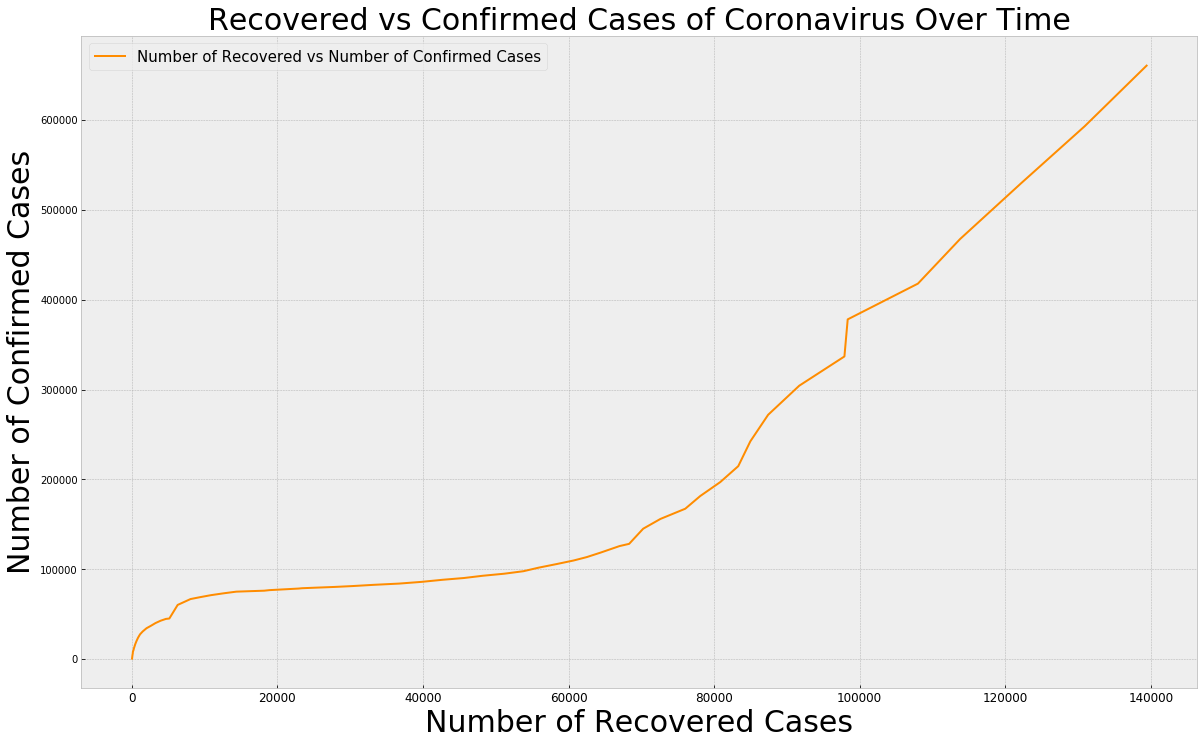

In [503]:
##Recovered vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, world_cases, color='darkorange')
plt.title('Recovered vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Recovered vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Recovered Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

## Coronavirus Linear Regression & Support-Vector Machine (SVM) Predictions

In [504]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [505]:
warnings.filterwarnings("ignore")

In [506]:
# Train parameters to predict labels, use 10% for Test set
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False)
X_train_active, X_test_active, y_train_active, y_test_active = train_test_split(days_since_1_22, active_cases, test_size=0.1, shuffle=False) 
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(days_since_1_22, mortality_rate , test_size=0.1, shuffle=False) 
X_train_Recovered, X_test_Recovered, y_train_Recovered, y_test_Recovered = train_test_split(days_since_1_22, Recovered_rate, test_size=0.1, shuffle=False) 

In [507]:
###Support Vector Machine prediction
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_pred_confirmed = svm_confirmed.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_active, y_train_active)
svm_search.best_params_
svm_active = svm_search.best_estimator_
svm_pred_active = svm_active.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_recovered, y_train_recovered)
svm_search.best_params_
svm_recovered = svm_search.best_estimator_
svm_pred_recovered = svm_recovered.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_deaths, y_train_deaths)
svm_search.best_params_
svm_deaths = svm_search.best_estimator_
svm_pred_deaths = svm_deaths.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_mortality, y_train_mortality)
svm_search.best_params_
svm_mortality = svm_search.best_estimator_
svm_pred_mortality = svm_mortality.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_Recovered, y_train_Recovered)
svm_search.best_params_
svm_Recovered = svm_search.best_estimator_
svm_pred_Recovered = svm_Recovered.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.8s finished


In [508]:
###Linear regression prediction
linear_model = LinearRegression(fit_intercept=False, normalize=True)

In [509]:
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred_confirmed = linear_model.predict(X_test_confirmed)
linear_pred_confirmed = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_confirmed, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred_confirmed, y_test_confirmed))

MAE: 297268.4983762997
MSE: 98936123659.55942


In [510]:
linear_model.fit(X_train_active, y_train_active)
test_linear_pred_active = linear_model.predict(X_test_active)
linear_pred_active = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_active, y_test_active))
print('MSE:',mean_squared_error(test_linear_pred_active, y_test_active))

MAE: 240460.5271044011
MSE: 65105953551.77665


In [511]:
linear_model.fit(X_train_recovered, y_train_recovered)
test_linear_pred_recovered = linear_model.predict(X_test_recovered)
linear_pred_recovered = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred_recovered, y_test_recovered))

MAE: 41752.655120353236
MSE: 1896979642.2909706


In [512]:
linear_model.fit(X_train_deaths, y_train_deaths)
test_linear_pred_deaths = linear_model.predict(X_test_deaths)
linear_pred_deaths = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_deaths, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_pred_deaths, y_test_deaths))

MAE: 15055.316151545367
MSE: 253243885.61067626


In [513]:
linear_model.fit(X_train_mortality, y_train_mortality)
test_linear_pred_mortality = linear_model.predict(X_test_mortality)
linear_pred_mortality = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_mortality, y_test_mortality))
print('MSE:',mean_squared_error(test_linear_pred_mortality, y_test_mortality))

MAE: 0.00788276340226318
MSE: 6.264816696395865e-05


In [514]:
linear_model.fit(X_train_Recovered, y_train_Recovered)
test_linear_pred_Recovered = linear_model.predict(X_test_Recovered)
linear_pred_Recovered = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_Recovered, y_test_Recovered))
print('MSE:',mean_squared_error(test_linear_pred_Recovered, y_test_Recovered))

MAE: 0.32931242066480554
MSE: 0.11031107280564598


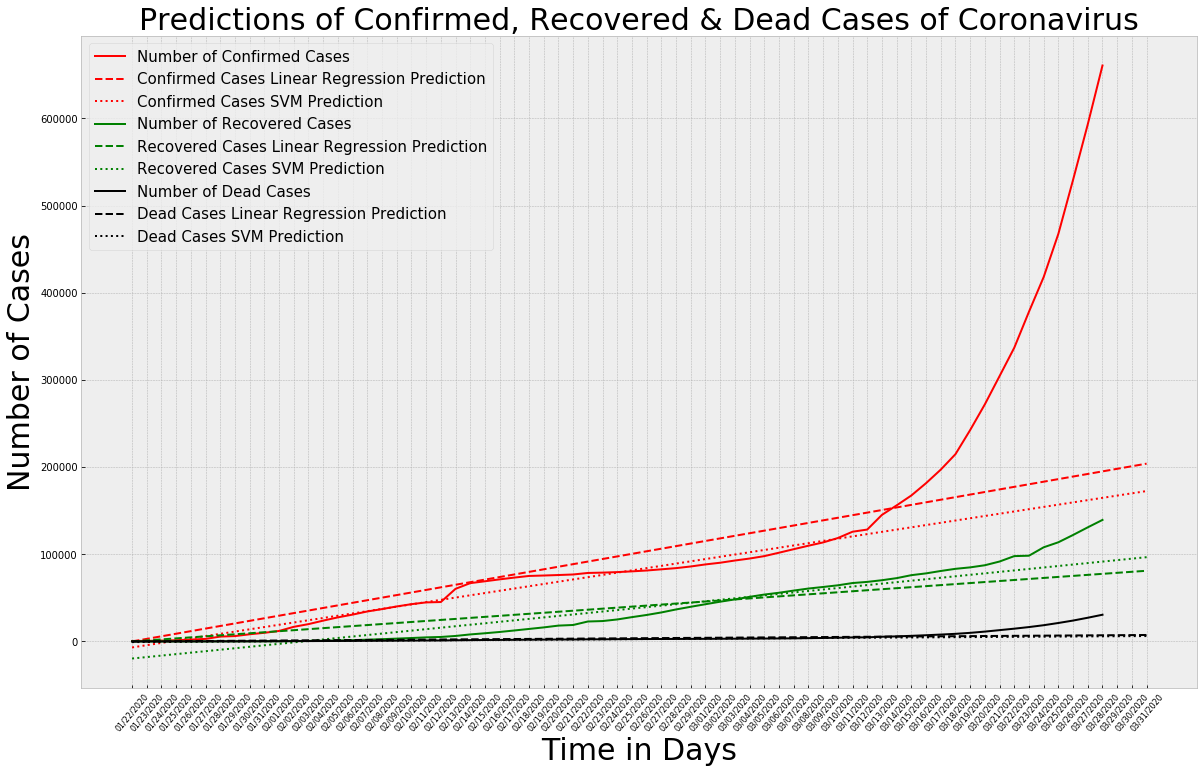

In [515]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_pred_confirmed, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_pred_confirmed, linestyle='dotted', color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_pred_recovered, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_pred_recovered, linestyle='dotted', color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.plot(future_forcast_dates, linear_pred_deaths, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_pred_deaths, linestyle='dotted', color='black')
plt.title('Predictions of Confirmed, Recovered & Dead Cases of Coronavirus', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Recovered Cases', 'Recovered Cases Linear Regression Prediction', 'Recovered Cases SVM Prediction', 'Number of Dead Cases', 'Dead Cases Linear Regression Prediction', 'Dead Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

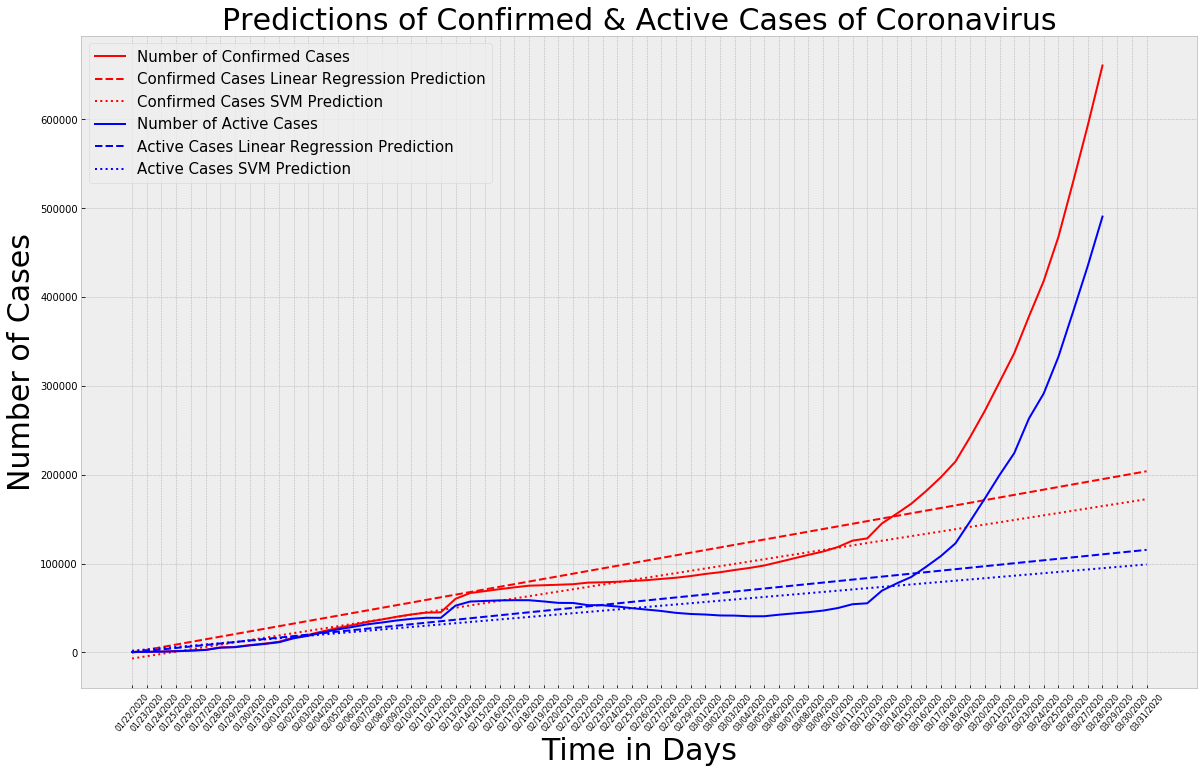

In [516]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_pred_confirmed, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_pred_confirmed, linestyle='dotted', color='red')
plt.plot(adjusted_dates, active_cases, color='blue')
plt.plot(future_forcast_dates, linear_pred_active, linestyle='dashed', color='blue')
plt.plot(future_forcast_dates, svm_pred_active, linestyle='dotted', color='blue')
plt.title('Predictions of Confirmed & Active Cases of Coronavirus', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

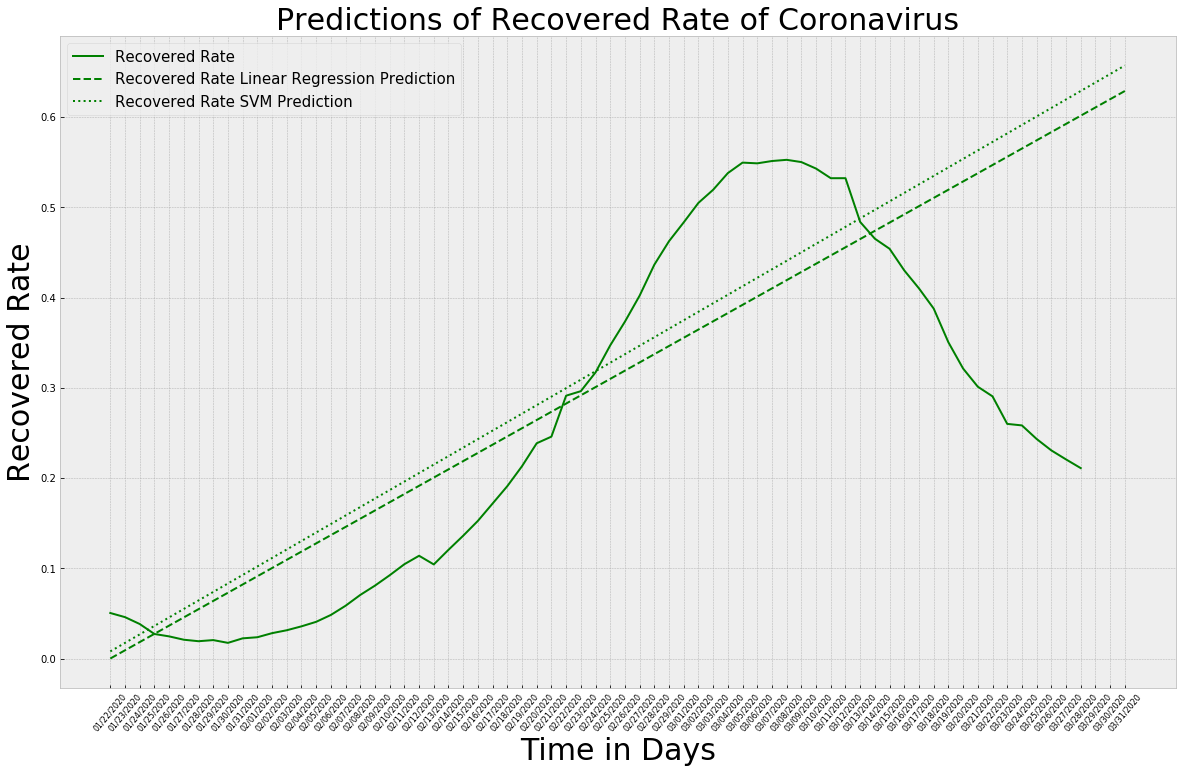

In [517]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Recovered_rate, color='green')
plt.plot(future_forcast_dates, linear_pred_Recovered, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_pred_Recovered, linestyle='dotted', color='green')
plt.title('Predictions of Recovered Rate of Coronavirus', size=30)
plt.legend(['Recovered Rate', 'Recovered Rate Linear Regression Prediction', 'Recovered Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Recovered Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

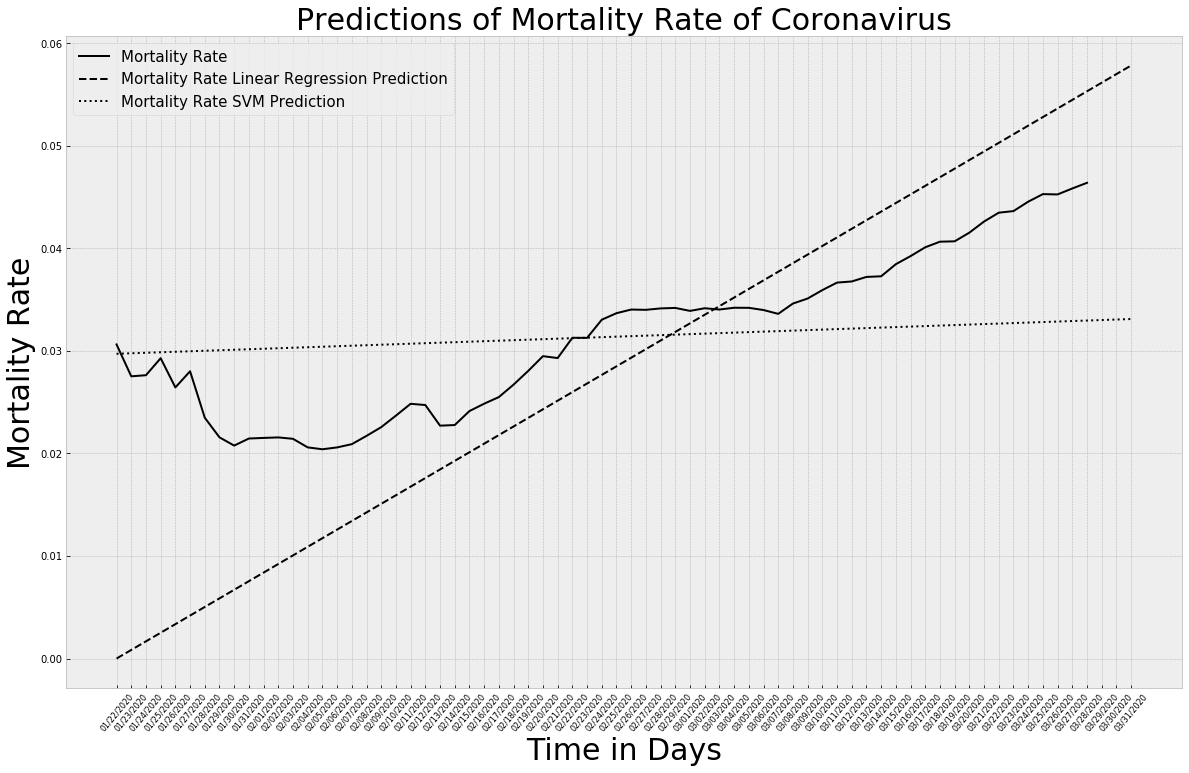

In [518]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='black')
plt.plot(future_forcast_dates, linear_pred_mortality, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_pred_mortality, linestyle='dotted', color='black')
plt.title('Predictions of Mortality Rate of Coronavirus', size=30)
plt.legend(['Mortality Rate', 'Mortality Rate Linear Regression Prediction', 'Mortality Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

# CoronaVirus Map

In [519]:
import folium

In [520]:
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'03-28-2020'

In [521]:
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [522]:
###Import the data
global_df = pd.read_csv(file_path, error_bad_lines=False)

In [523]:
global_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-28 23:05:37,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-28 23:05:37,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-28 23:05:37,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-28 23:05:37,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-28 23:05:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [524]:
def generateBaseMap(default_location=[20.693943, 3.985880], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [525]:
### Plot Confirmed Cases WorldMap
from folium.plugins import HeatMap
global_df['Confirmed']
heat_map = generateBaseMap()
HeatMap(data=global_df[['Lat', 'Long_', 'Confirmed']].groupby(['Lat', 'Long_']).sum().reset_index().values.tolist(), radius=8, max_zoom=7).add_to(heat_map)
heat_map.save('Confirmed.html')
heat_map

In [526]:
import selenium.webdriver# import Selenium to show map in Github as image as html is not displayed
driver = selenium.webdriver.PhantomJS()
driver.set_window_size(1200, 500)  # choose a resolution
driver.get('Confirmed.html')
driver.save_screenshot('Confirmed.png')

True

Populating the interactive namespace from numpy and matplotlib


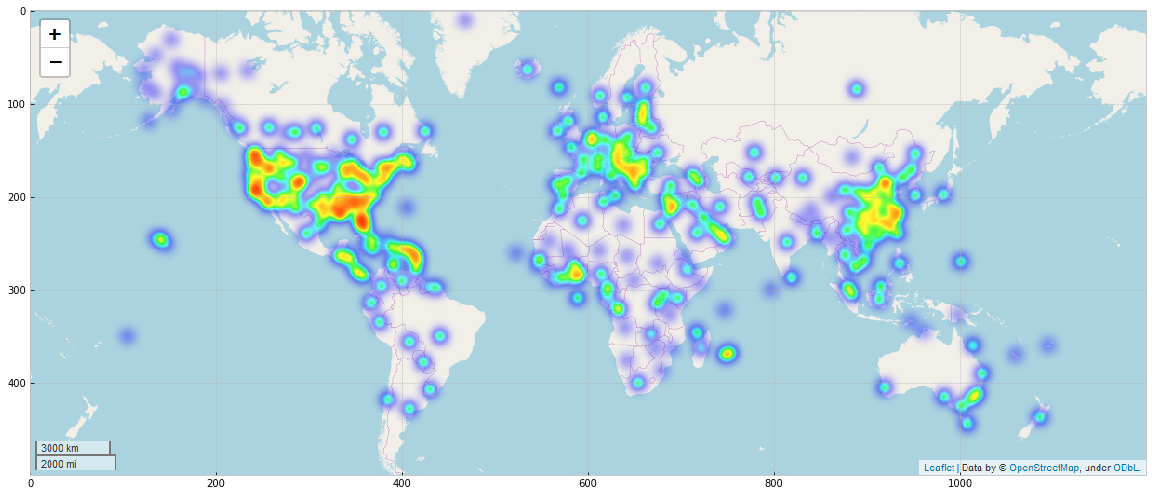

In [527]:
### Show Confirmed Cases WorldMap
%pylab inline
import matplotlib.image as mpimg
plt.figure(figsize=(20, 12))
img=mpimg.imread('Confirmed.png')
imgplot = plt.imshow(img)
plt.show()

In [528]:
###Plot Recovered Cases WorldMap
global_df['Recovered']
heat_map = generateBaseMap()
HeatMap(data=global_df[['Lat', 'Long_', 'Recovered']].groupby(['Lat', 'Long_']).sum().reset_index().values.tolist(), radius=8, max_zoom=7).add_to(heat_map)
heat_map.save('Recovered.html')
heat_map

In [529]:
driver = selenium.webdriver.PhantomJS()
driver.set_window_size(1200, 500)  # choose a resolution
driver.get('Recovered.html')
driver.save_screenshot('Recovered.png')

True

Populating the interactive namespace from numpy and matplotlib


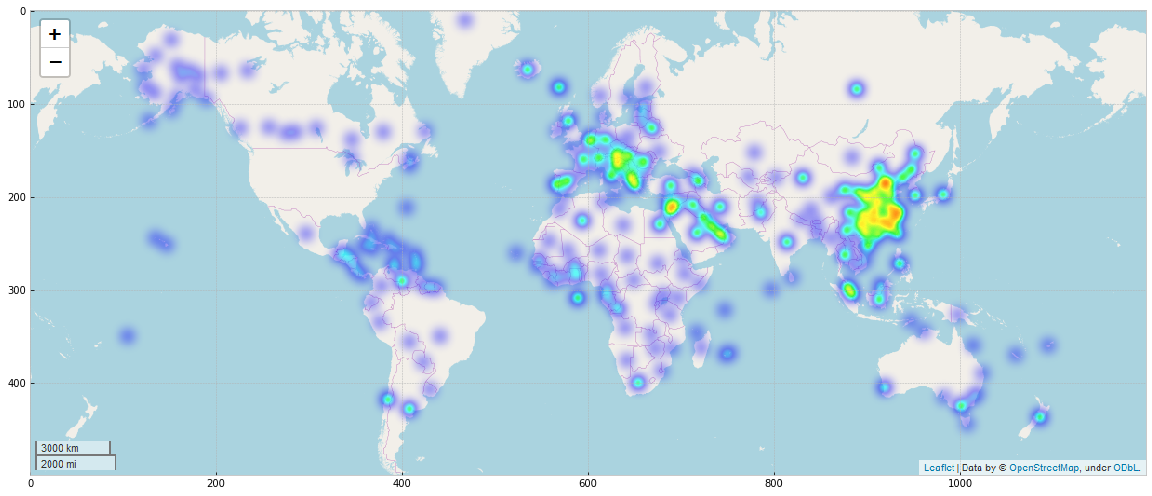

In [530]:
### Show Recovered Cases WorldMap
%pylab inline
plt.figure(figsize=(20, 12))
img=mpimg.imread('Recovered.png')
imgplot = plt.imshow(img)
plt.show()

In [531]:
### Plot Dead Cases WorldMap
global_df['Deaths']
heat_map = generateBaseMap()
HeatMap(data=global_df[['Lat', 'Long_', 'Deaths']].groupby(['Lat', 'Long_']).sum().reset_index().values.tolist(), radius=8, max_zoom=7).add_to(heat_map)
heat_map.save('Dead.html')
heat_map

In [532]:
driver = selenium.webdriver.PhantomJS()
driver.set_window_size(1200, 500)  # choose a resolution
driver.get('Dead.html')
driver.save_screenshot('Dead.png')

True

Populating the interactive namespace from numpy and matplotlib


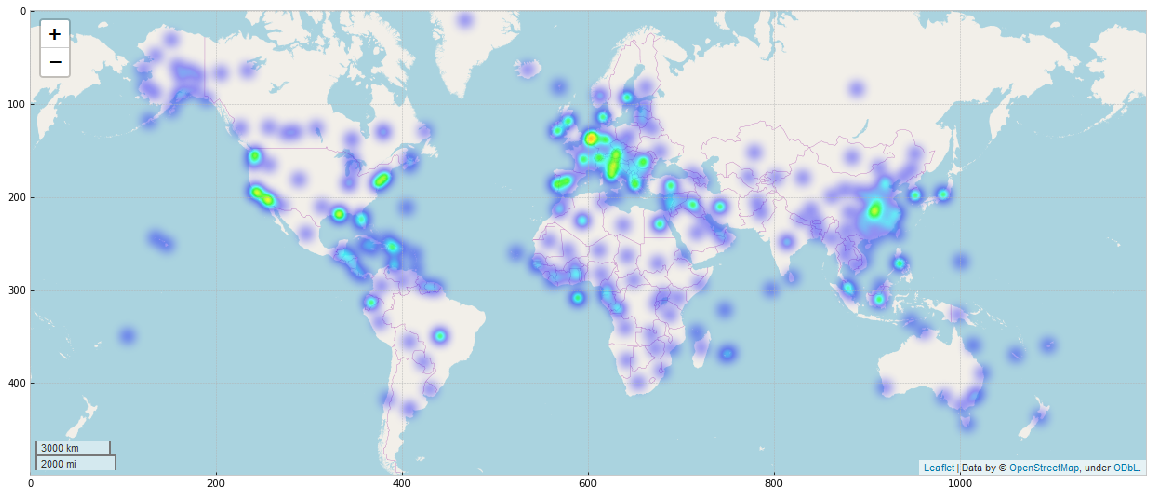

In [533]:
### Show Dead Cases WorldMap
%pylab inline
plt.figure(figsize=(20, 12))
img=mpimg.imread('Dead.png')
imgplot = plt.imshow(img)
plt.show()